In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize

In [6]:
# Metrics dictionary
accuracy = dict()
f1 = dict()

In [7]:
# read train and test datasets
x_train = pd.read_csv("X_train.csv")
x_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")
x = pd.concat([x_train,x_test])
y = pd.concat([y_train,y_test])
print(f'Train data: {x_train.shape, y_train.shape}')
print(f'Test data: {x_test.shape, y_test.shape}')

Train data: ((237441, 33), (237441, 1))
Test data: ((101761, 33), (101761, 1))


# **Decision Tree**

A decision tree is a hierarchical model that recursively partitions the input space based on feature values, leading to predictive outcomes at leaf nodes. It utilizes a series of decision rules inferred from training data to make predictions for new instances.

In [17]:
#without any hyperparameter tuning
dtc = DecisionTreeClassifier(random_state=42)
print("Default scores:")
dtc.fit(x_train, y_train)
print("Train score:", dtc.score(x_train, y_train))
print("Test score:", dtc.score(x_test, y_test))

Default scores:
Train score: 0.9997978445171642
Test score: 0.8512593233163982


In [18]:
#classification report (without any hyperparameter tuning)
y_pred = dtc.predict(x_test)

accuracy["Decision Tree"] = accuracy_score(y_test, y_pred)
f1["Decision Tree"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, pd.DataFrame(dtc.predict(x_train))))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2367
           1       1.00      1.00      1.00    186294
           2       1.00      1.00      1.00     45415
           3       1.00      0.99      0.99      3365

    accuracy                           1.00    237441
   macro avg       1.00      1.00      1.00    237441
weighted avg       1.00      1.00      1.00    237441

              precision    recall  f1-score   support

           0       0.54      0.55      0.54      1081
           1       0.91      0.91      0.91     79845
           2       0.68      0.69      0.69     19392
           3       0.19      0.22      0.20      1443

    accuracy                           0.85    101761
   macro avg       0.58      0.59      0.59    101761
weighted avg       0.85      0.85      0.85    101761



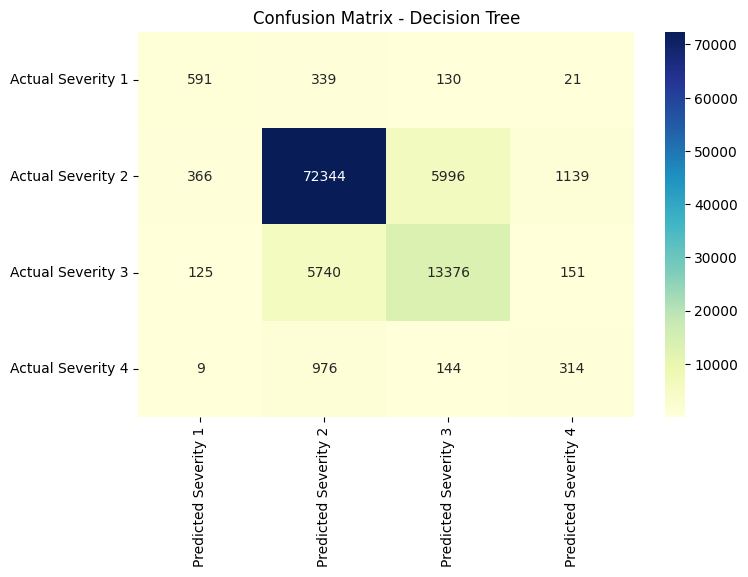

In [19]:
#confusion matrix (without any hyperparameter tuning)
y_pred = dtc.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [20]:
# Decision Tree Hyperparameters
dtc_params = {
    'max_depth': [None] + list(range(1, 20)),
    'min_samples_split': list(range(2, 21)),
    'min_samples_leaf': list(range(1, 21)),
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': [None, 'sqrt', 'log2']
}
# Initialize Random Search
dtc_random_search = RandomizedSearchCV(estimator=dtc, param_distributions=dtc_params, n_iter=20, cv=3, n_jobs=-1, verbose=1, random_state=42)
# Fit the model
dtc_random_search.fit(x_train, y_train)
print(dtc_random_search.best_estimator_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
DecisionTreeClassifier(max_depth=16, min_samples_leaf=19, min_samples_split=17,
                       random_state=42)


In [24]:
pd.DataFrame(dtc_random_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,4.497580,0.230612,0.062137,0.024235,best,17,19,None,16,gini,"{'splitter': 'best', 'min_samples_split': 17, ...",0.871518,0.872263,0.872528,0.872103,0.000428,1
5,5.875503,0.767944,0.045953,0.000457,best,3,9,None,16,entropy,"{'splitter': 'best', 'min_samples_split': 3, '...",0.868447,0.867828,0.867651,0.867976,0.000341,2
11,7.337208,0.812958,0.063393,0.015905,best,8,2,None,18,gini,"{'splitter': 'best', 'min_samples_split': 8, '...",0.864682,0.861940,0.865617,0.864080,0.001560,3
1,1.048124,0.006531,0.057485,0.001172,best,14,3,sqrt,None,gini,"{'splitter': 'best', 'min_samples_split': 14, ...",0.843165,0.842672,0.844644,0.843494,0.000838,4
10,1.123553,0.075646,0.047254,0.009912,random,14,2,None,7,gini,"{'splitter': 'random', 'min_samples_split': 14...",0.838187,0.841283,0.846021,0.841830,0.003221,5
7,1.810850,0.450374,0.139656,0.001957,best,13,3,sqrt,18,entropy,"{'splitter': 'best', 'min_samples_split': 13, ...",0.841396,0.838187,0.837833,0.839139,0.001603,6
2,0.850189,0.030071,0.046590,0.001919,best,13,2,log2,13,entropy,"{'splitter': 'best', 'min_samples_split': 13, ...",0.845882,0.834965,0.835395,0.838747,0.005048,7
3,1.518682,0.023143,0.032331,0.001035,best,9,5,None,4,entropy,"{'splitter': 'best', 'min_samples_split': 9, '...",0.837341,0.834473,0.836444,0.836086,0.001198,8
15,0.683663,0.064359,0.032056,0.001791,random,20,12,None,6,entropy,"{'splitter': 'random', 'min_samples_split': 20...",0.836785,0.829583,0.841156,0.835841,0.004772,9
8,0.866787,0.334599,0.099684,0.033405,random,8,2,sqrt,19,gini,"{'splitter': 'random', 'min_samples_split': 8,...",0.825717,0.816999,0.831592,0.824769,0.005995,10


In [25]:
# with best hyperparameters
dtc_params_best = {'max_depth': 16, 'min_samples_leaf': 19, 'min_samples_split': 17, 'criterion':'gini', 'splitter':'best','random_state': 42}
dtc_best_classifier = DecisionTreeClassifier(**dtc_params_best)
dtc_best_classifier.fit(x_train, y_train)
print("Best scores:")
print("Train score:", dtc_best_classifier.score(x_train, y_train))
print("Test score:", dtc_best_classifier.score(x_test, y_test))

Best scores:
Train score: 0.8962605447247948
Test score: 0.8756596338479378


In [26]:
#classification report (with hyperparameter tuning)
y_pred_best = dtc_best_classifier.predict(x_test)

accuracy["Decision Tree (with best hyperparameter)"] = accuracy_score(y_test, y_pred_best)
f1["Decision Tree (with best hyperparameter)"] = f1_score(y_test, y_pred_best, average="macro")

print(classification_report(y_train, pd.DataFrame(dtc_best_classifier.predict(x_train))))
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.71      0.66      0.68      2367
           1       0.92      0.96      0.94    186294
           2       0.81      0.71      0.76     45415
           3       0.61      0.24      0.35      3365

    accuracy                           0.90    237441
   macro avg       0.76      0.64      0.68    237441
weighted avg       0.89      0.90      0.89    237441

              precision    recall  f1-score   support

           0       0.66      0.60      0.63      1081
           1       0.91      0.94      0.92     79845
           2       0.76      0.66      0.71     19392
           3       0.39      0.16      0.23      1443

    accuracy                           0.88    101761
   macro avg       0.68      0.59      0.62    101761
weighted avg       0.87      0.88      0.87    101761



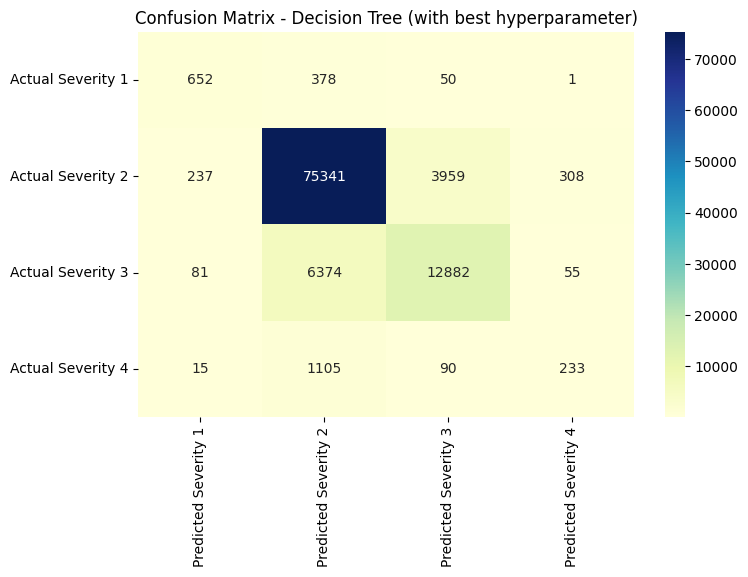

In [27]:
#confusion matrix (with hyperparameter tuning)
y_pred_best = dtc_best_classifier.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_best)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree (with best hyperparameter)")
plt.show()

<ipython-input-36-aaa804a35e9e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y=importances.index, data=importances, palette=colors)


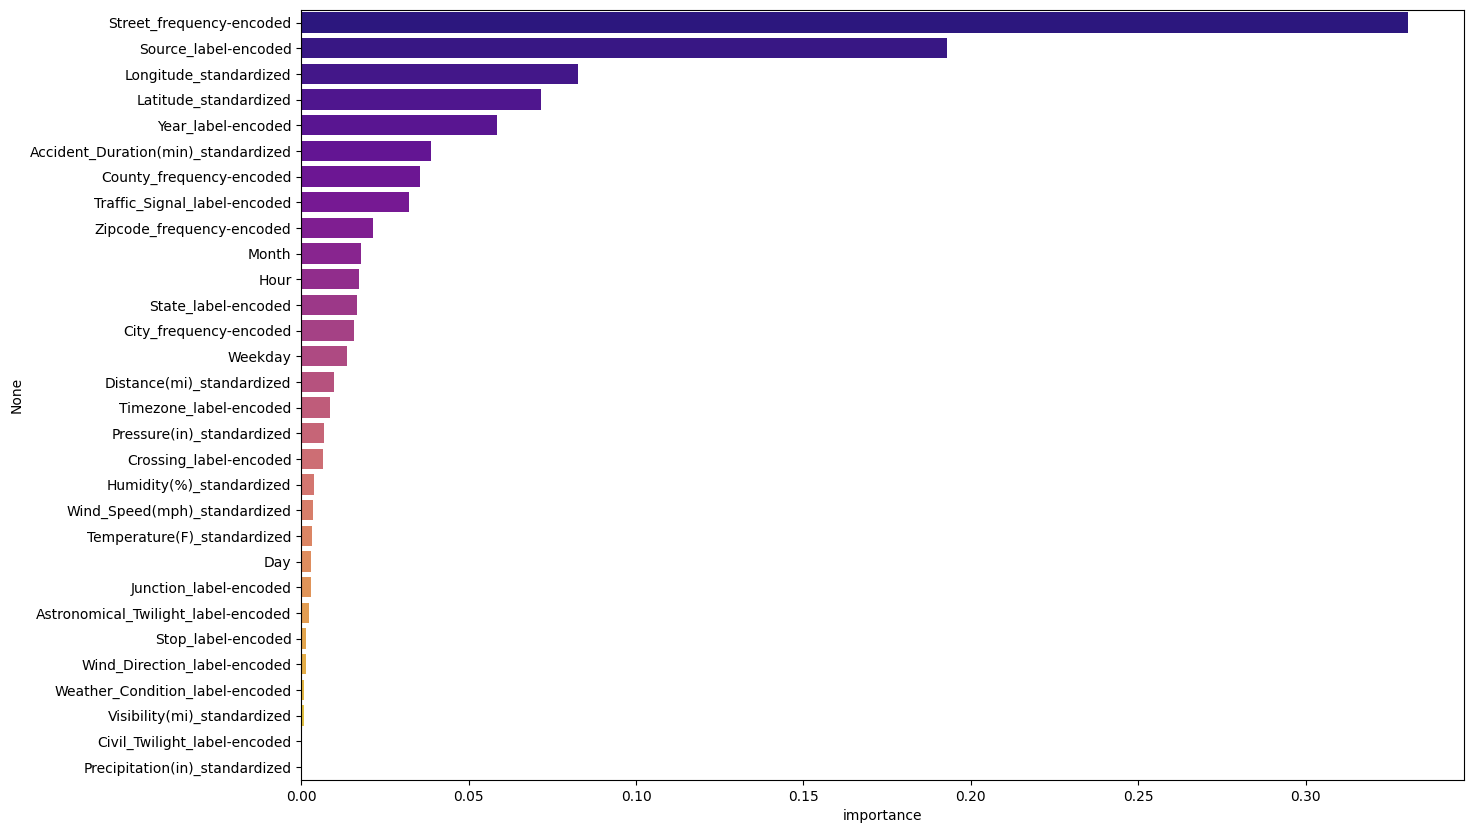

In [36]:
#importance of features as predictors
importances = pd.DataFrame(np.zeros((x_train.shape[1], 1)), columns=["importance"], index=x_train.columns)
importances.iloc[:,0] = dtc_best_classifier.feature_importances_
importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
colors = sns.color_palette("plasma", n_colors=len(importances))
sns.barplot(x="importance", y=importances.index, data=importances, palette=colors)
plt.show()

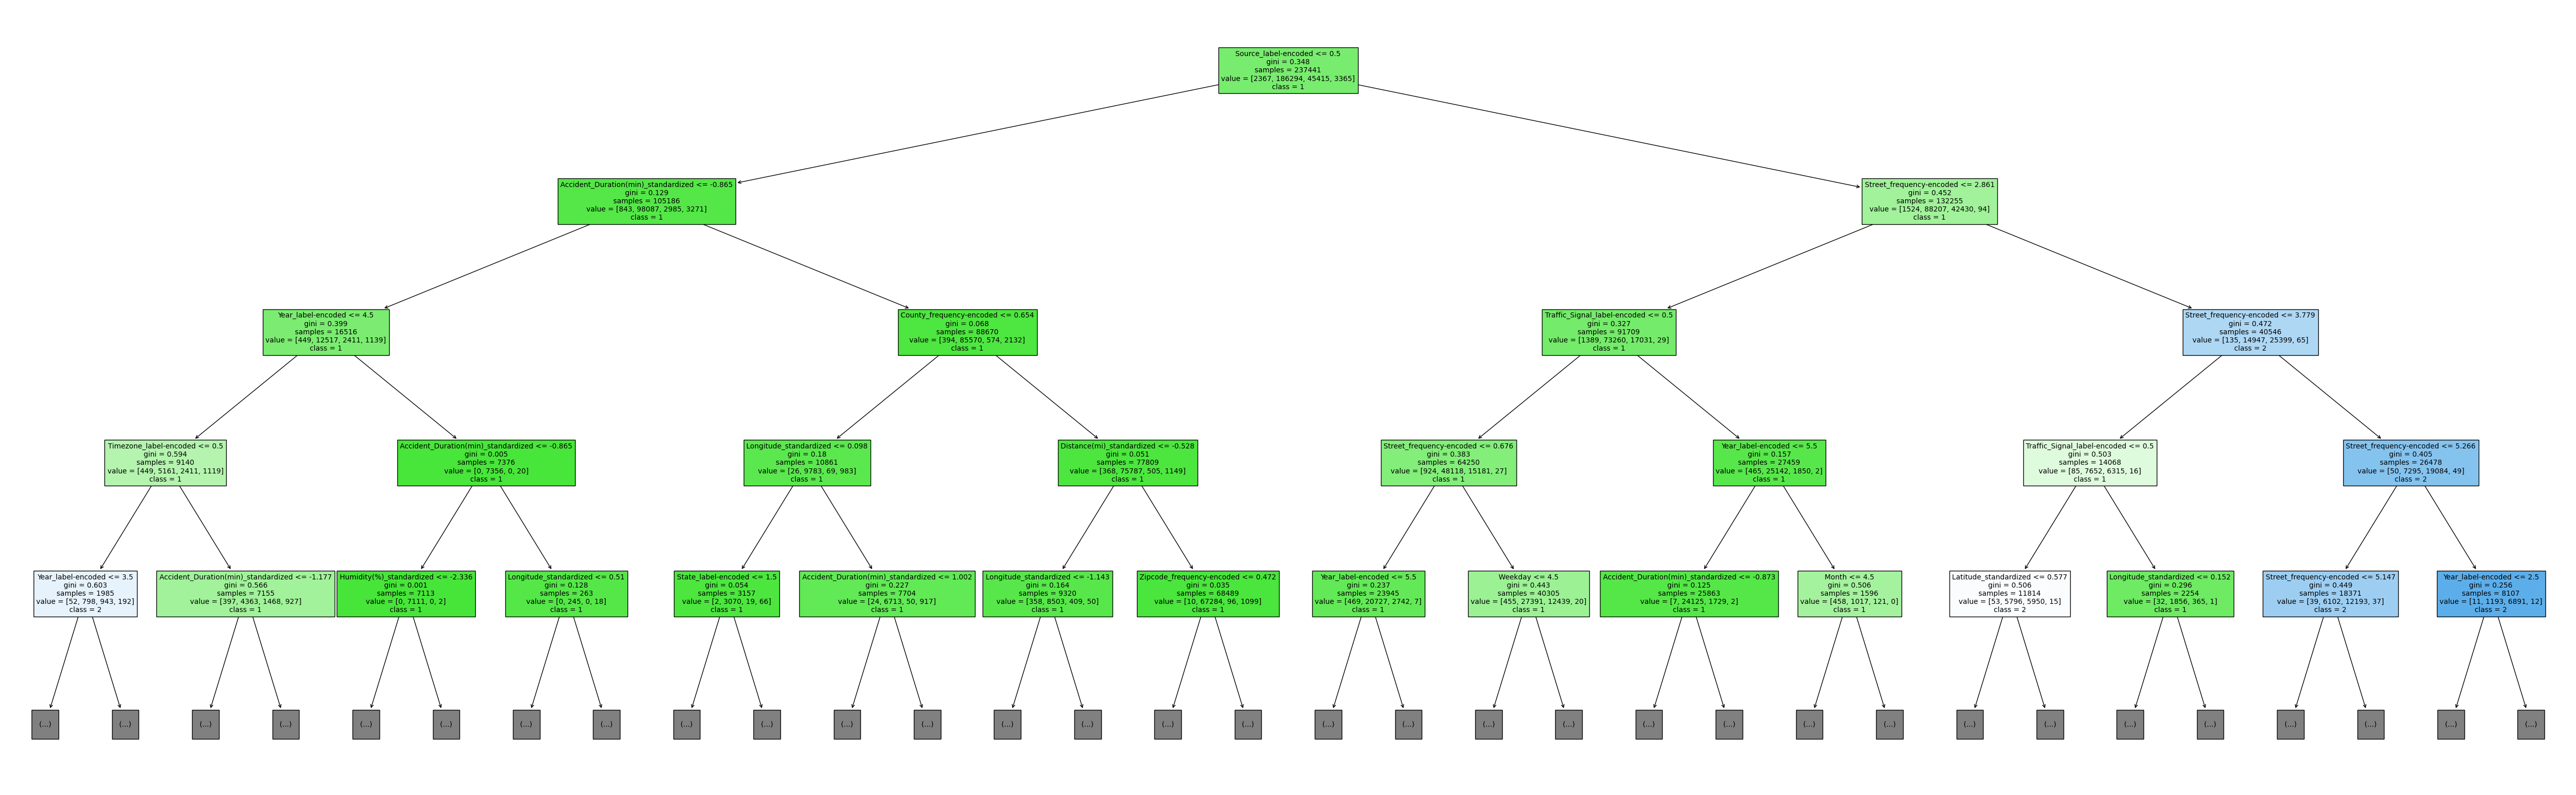

In [45]:
#best decision tree
class_names = ["0", "1", "2", "3"]
fig, ax = plt.subplots(figsize=(65, 20))
plot_tree(dtc_best_classifier, max_depth=4, fontsize=10, feature_names=x_train.columns.to_list(), class_names = class_names, filled=True)
plt.show()

# **Random Forest**

Random Forest is an ensemble learning method that constructs multiple decision trees during training and outputs the classification of individual trees. It improves accuracy and reduces overfitting by averaging the predictions of diverse trees.

In [46]:
#without any hyperparameter tuning
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
print("Default scores:")
rfc.fit(x_train, y_train)
print("Train score:", rfc.score(x_train, y_train))
print("Test score:", rfc.score(x_test, y_test))

Default scores:


<ipython-input-46-2d2f1a8aa7d2>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(x_train, y_train)


Train score: 0.9997767866543689
Test score: 0.8940949872741031


In [47]:
#classification report (without any hyperparameter tuning)
y_pred = rfc.predict(x_test)

accuracy["Random Forest"] = accuracy_score(y_test, y_pred)
f1["Random Forest"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, pd.DataFrame(rfc.predict(x_train))))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2367
           1       1.00      1.00      1.00    186294
           2       1.00      1.00      1.00     45415
           3       1.00      0.99      0.99      3365

    accuracy                           1.00    237441
   macro avg       1.00      1.00      1.00    237441
weighted avg       1.00      1.00      1.00    237441

              precision    recall  f1-score   support

           0       0.78      0.45      0.57      1081
           1       0.91      0.96      0.94     79845
           2       0.82      0.69      0.75     19392
           3       0.59      0.07      0.13      1443

    accuracy                           0.89    101761
   macro avg       0.78      0.55      0.60    101761
weighted avg       0.89      0.89      0.89    101761



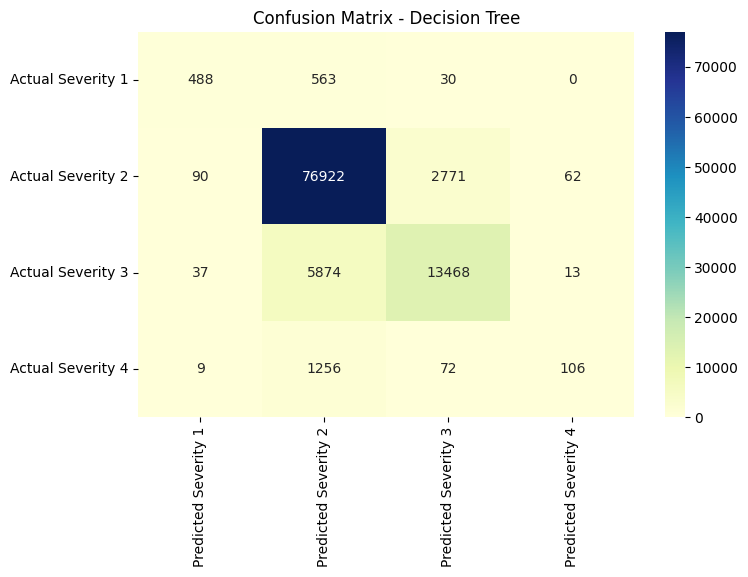

In [48]:
#confusion matrix (without any hyperparameter tuning)
y_pred = rfc.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [49]:
# Random Forest Hyperparameters
rfc_params = {
    'n_estimators': list(range(100, 1001, 100)),  # Number of trees in the forest
    'max_depth': [None] + list(range(5, 31)),  # Maximum number of levels in each decision tree
    'min_samples_split': list(range(2, 21)),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': list(range(1, 21)),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # The number of features to consider when looking for the best split
    'bootstrap': [True, False],  # Method of selecting samples for training each tree
}
# Initialize Random Search
rfc_random_search = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_params, n_iter=20, cv=3, n_jobs=-1, verbose=1, random_state=42)
# Fit the model
rfc_random_search.fit(x_train, y_train)
print(rfc_random_search.best_estimator_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomForestClassifier(bootstrap=False, max_depth=22, max_features='log2',
                       min_samples_leaf=5, min_samples_split=9, n_jobs=-1,
                       random_state=42)


In [ ]:
pd.DataFrame(rfc_random_search.cv_results_).sort_values(by="rank_test_score")

In [ ]:
# with best hyperparameters
rfc_params_best = {'max_depth': 16, 'min_samples_leaf': 19, 'min_samples_split': 17, 'criterion':'gini', 'splitter':'best','random_state': 42}
rfc_best_classifier = RandomForestClassifier(**rfc_params_best)
rfc_best_classifier.fit(x_train, y_train)
print("Best scores:")
print("Train score:", rfc_best_classifier.score(x_train, y_train))
print("Test score:", rfc_best_classifier.score(x_test, y_test))

In [ ]:
#classification report (with hyperparameter tuning)
y_pred_best = rfc_best_classifier.predict(x_test)

accuracy["Random Forest (with best hyperparameter)"] = accuracy_score(y_test, y_pred_best)
f1["Random Forest (with best hyperparameter)"] = f1_score(y_test, y_pred_best, average="macro")

print(classification_report(y_train, pd.DataFrame(rfc_best_classifier.predict(x_train))))
print(classification_report(y_test, y_pred_best))

In [ ]:
#confusion matrix (with hyperparameter tuning)
y_pred_best = rfc_best_classifier.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_best)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest (with best hyperparameter)")
plt.show()

In [ ]:
#importance of features as predictors
importances = pd.DataFrame(np.zeros((x_train.shape[1], 1)), columns=["importance"], index=x_train.columns)
importances.iloc[:,0] = rfc_best_classifier.feature_importances_
importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
colors = sns.color_palette("plasma", n_colors=len(importances))
sns.barplot(x="importance", y=importances.index, data=importances, palette=colors)
plt.show()

# **Balanced Bagging Classifier**

The Balanced Bagging Classifier is an ensemble learning method specifically designed to address the challenge of class imbalance in datasets. It combines the concepts of bagging and class balancing to create a robust classifier, particularly effective when dealing with imbalanced data.

In [1]:
!pip install imblearn

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from imblearn.ensemble import BalancedBaggingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
#without any hyperparameter tuning
base_classifier = RandomForestClassifier(n_estimators=10, random_state=42)
bbc = BalancedBaggingClassifier(estimator=base_classifier,
                                                  sampling_strategy='auto',  # 'auto' will automatically balance the classes
                                                  n_estimators=10,           # Number of base classifiers
                                                  random_state=42)
print("Default scores:")
bbc.fit(x_train, y_train)
print("Train score:", bbc.score(x_train, y_train))
print("Test score:", bbc.score(x_test, y_test))

Default scores:


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_bagging.py:353: FutureWarning: `base_estimator` was renamed to `estimator` in version 0.10 and will be removed in 0.12.
  warnings.warn(


Train score: 0.712737058890419
Test score: 0.7005729110366447


In [12]:
#classification report (without any hyperparameter tuning)
y_pred = bbc.predict(x_test)

accuracy["Balanced Bagging"] = accuracy_score(y_test, y_pred)
f1["Balanced Bagging"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, pd.DataFrame(bbc.predict(x_train))))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.25      1.00      0.40      2367
           1       0.97      0.67      0.80    186294
           2       0.55      0.84      0.66     45415
           3       0.11      0.96      0.20      3365

    accuracy                           0.71    237441
   macro avg       0.47      0.87      0.51    237441
weighted avg       0.87      0.71      0.76    237441

              precision    recall  f1-score   support

           0       0.25      0.95      0.39      1081
           1       0.96      0.66      0.79     79845
           2       0.54      0.83      0.65     19392
           3       0.09      0.82      0.17      1443

    accuracy                           0.70    101761
   macro avg       0.46      0.82      0.50    101761
weighted avg       0.86      0.70      0.75    101761



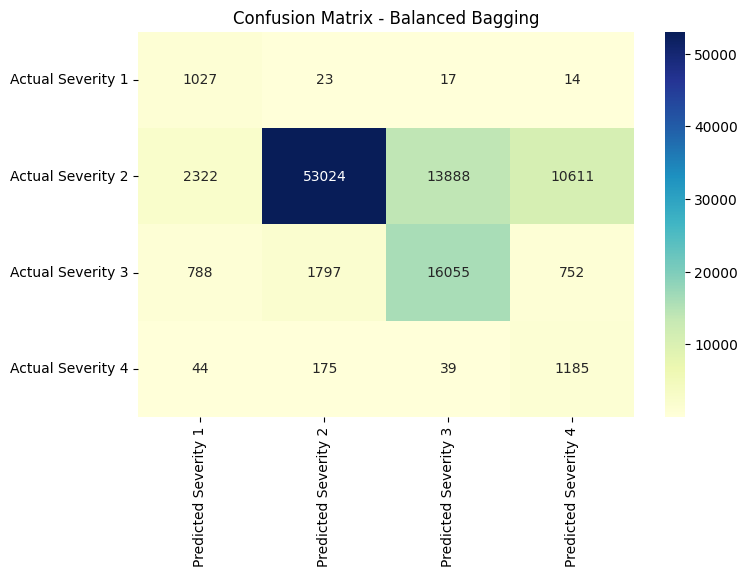

In [13]:
#confusion matrix (without any hyperparameter tuning)
y_pred = bbc.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Balanced Bagging")
plt.show()

In [22]:
# balanced bagging Hyperparameters
bbc_params = {
    'n_estimators': list(range(100, 1001, 100)),
    'bootstrap': [True, False],
    'bootstrap_features': [True, False],
    'max_samples': [0.5, 0.75, 1.0],
    'sampling_strategy': ['auto', 0.5, 'minority', {0: 1000, 1: 500}],
    'replacement': [True, False],  # Method of selecting samples for training each tree
    'oob_score': [True, False]
}
# Initialize Random Search
bbc_random_search = RandomizedSearchCV(estimator=bbc, param_distributions=bbc_params, n_iter=20, cv=3, n_jobs=-1, verbose=1, random_state=42)
# Fit the model
bbc_random_search.fit(x_train, y_train)
print(bbc_random_search.best_estimator_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
51 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_ba

BalancedBaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=10,
                                                                random_state=42),
                          bootstrap_features=True, max_samples=0.5,
                          n_estimators=800, random_state=42, replacement=True)


In [23]:
pd.DataFrame(bbc_random_search.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_sampling_strategy,param_replacement,param_oob_score,param_n_estimators,param_max_samples,param_bootstrap_features,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
18,242.285307,14.600995,214.460135,4.194806,auto,True,False,800,0.5,True,True,"{'sampling_strategy': 'auto', 'replacement': T...",0.656209,0.660770,0.652179,0.656386,0.003510,1
11,58.708556,2.292146,55.196994,0.447763,auto,False,False,200,0.5,True,False,"{'sampling_strategy': 'auto', 'replacement': F...",0.609840,0.611091,0.606883,0.609271,0.001764,2
10,686.189160,26.548498,128.549534,1.903018,"{0: 1000, 1: 500}",True,False,400,1.0,True,False,"{'sampling_strategy': {0: 1000, 1: 500}, 'repl...",0.239895,0.230230,0.233490,0.234538,0.004015,3
0,0.116478,0.030329,0.000000,0.000000,minority,False,True,300,0.5,True,False,"{'sampling_strategy': 'minority', 'replacement...",NaN,NaN,NaN,NaN,NaN,4
17,0.239288,0.035618,0.000000,0.000000,"{0: 1000, 1: 500}",True,True,700,0.5,True,True,"{'sampling_strategy': {0: 1000, 1: 500}, 'repl...",NaN,NaN,NaN,NaN,NaN,4
16,0.091204,0.001251,0.000000,0.000000,auto,False,True,700,1.0,False,False,"{'sampling_strategy': 'auto', 'replacement': F...",NaN,NaN,NaN,NaN,NaN,4
15,0.042500,0.003587,0.000000,0.000000,minority,False,True,500,0.75,True,False,"{'sampling_strategy': 'minority', 'replacement...",NaN,NaN,NaN,NaN,NaN,4
14,0.089950,0.001255,0.000000,0.000000,auto,False,True,800,0.5,False,False,"{'sampling_strategy': 'auto', 'replacement': F...",NaN,NaN,NaN,NaN,NaN,4
13,0.201022,0.023213,0.000000,0.000000,"{0: 1000, 1: 500}",False,False,700,0.5,False,True,"{'sampling_strategy': {0: 1000, 1: 500}, 'repl...",NaN,NaN,NaN,NaN,NaN,4
12,0.094187,0.002840,0.000000,0.000000,auto,True,True,600,1.0,True,False,"{'sampling_strategy': 'auto', 'replacement': T...",NaN,NaN,NaN,NaN,NaN,4


In [24]:
# with best hyperparameters
bbc_params_best = {'bootstrap_features': True, 'estimator': RandomForestClassifier(n_estimators=10, random_state=42), 'max_samples': 0.5, 'n_estimators': 800, 'replacement': True,'random_state': 42}
bbc_best_classifier = BalancedBaggingClassifier(**bbc_params_best)
bbc_best_classifier.fit(x_train, y_train)
print("Best scores:")
print("Train score:", bbc_best_classifier.score(x_train, y_train))
print("Test score:", bbc_best_classifier.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best scores:
Train score: 0.6767744408084535
Test score: 0.6670237124242097


In [25]:
#classification report (with hyperparameter tuning)
y_pred_best = bbc_best_classifier.predict(x_test)

accuracy["Balanced Bagging (with best hyperparameter)"] = accuracy_score(y_test, y_pred_best)
f1["Balanced Bagging (with best hyperparameter)"] = f1_score(y_test, y_pred_best, average="macro")

print(classification_report(y_train, pd.DataFrame(bbc_best_classifier.predict(x_train))))
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.19      0.99      0.32      2367
           1       0.98      0.62      0.76    186294
           2       0.50      0.87      0.64     45415
           3       0.11      0.90      0.19      3365

    accuracy                           0.68    237441
   macro avg       0.45      0.84      0.48    237441
weighted avg       0.87      0.68      0.72    237441

              precision    recall  f1-score   support

           0       0.19      0.96      0.32      1081
           1       0.97      0.61      0.75     79845
           2       0.49      0.86      0.63     19392
           3       0.09      0.81      0.17      1443

    accuracy                           0.67    101761
   macro avg       0.44      0.81      0.47    101761
weighted avg       0.86      0.67      0.72    101761



In [ ]:
#confusion matrix (with hyperparameter tuning)
y_pred_best = bbc_best_classifier.predict(x_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred_best)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Balanced Bagging (with best hyperparameter)")
plt.show()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2367
           1       1.00      1.00      1.00    186294
           2       1.00      1.00      1.00     45415
           3       1.00      0.99      0.99      3365

    accuracy                           1.00    237441
   macro avg       1.00      1.00      1.00    237441
weighted avg       1.00      1.00      1.00    237441

              precision    recall  f1-score   support

           0       0.25      0.95      0.39      1081
           1       0.96      0.66      0.79     79845
           2       0.54      0.83      0.65     19392
           3       0.09      0.82      0.17      1443

    accuracy                           0.70    101761
   macro avg       0.46      0.82      0.50    101761
weighted avg       0.86      0.70      0.75    101761



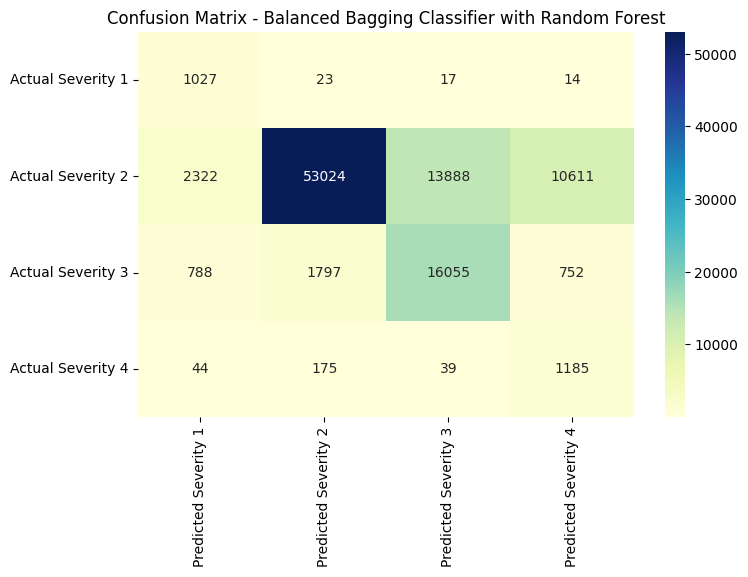

In [ ]:
#importance of features as predictors
importances = pd.DataFrame(np.zeros((x_train.shape[1], 1)), columns=["importance"], index=x_train.columns)
importances.iloc[:,0] = bbc_best_classifier.feature_importances_
importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
colors = sns.color_palette("plasma", n_colors=len(importances))
sns.barplot(x="importance", y=importances.index, data=importances, palette=colors)
plt.show()